In [123]:
import pandas as pd
import sklearn
import pymssql
import matplotlib.pyplot as plt
import math
#%matplotlib inline

In [67]:
data=pd.read_excel('.\\Documents\\Tencent Files/523017961/FileRecv/data of VIP Cluster.xlsx')
data.set_index('VIP_NO',inplace=True)

In [11]:
msconn = pymssql.connect(host='10.10.11.219', user='xx', password='xx', database='xx', charset="utf8")
mscur = msconn.cursor()
mscur.execute('''SELECT a.VIP_NO,COUNT(b.product_name) as sku_num,SUM(a.trans_amount) as trans_amount,COUNT(distinct(ORDER_NO)) as order_num
 FROM B2B_REAL_SERIAL_NUM AS A 
LEFT JOIN B2B_REAL_SERIAL_DETAIL AS B 
ON A.KID=B.PARENT_ID
where a.IS_VIP = 1 and VIP_NO is not null and a.is_delete=0
group by a.vip_no''')
data=pd.DataFrame(mscur.fetchall())  # 获取数据的指针
mscur.close()
msconn.close()
data.columns=['VIP_NO','sku_num','trans_amount','order_num']
data.set_index('VIP_NO',inplace=True)

In [117]:
from sklearn.cluster import KMeans
import numpy as np
kmeans = KMeans(n_clusters=3, random_state=0).fit(data)


In [118]:
print('kmeans.labels_: ',kmeans.labels_, '\nkmeans.cluster_centers_: \n',kmeans.cluster_centers_)

kmeans.labels_:  [0 0 0 ... 0 0 0] 
kmeans.cluster_centers_: 
 [[5.66790698e+00 4.45310233e+01 3.75720930e+00 1.22790698e-01]
 [4.70000000e+01 7.31322973e+02 1.82702703e+01 1.43243243e+00]
 [2.20622407e+01 2.49501618e+02 1.12282158e+01 1.89626556e+00]]


In [119]:
data['label']=kmeans.labels_

In [120]:
data['label'].value_counts()

0    1075
2     241
1      37
Name: label, dtype: int64

In [112]:
data=data[data['label']!=1] #去除离群点

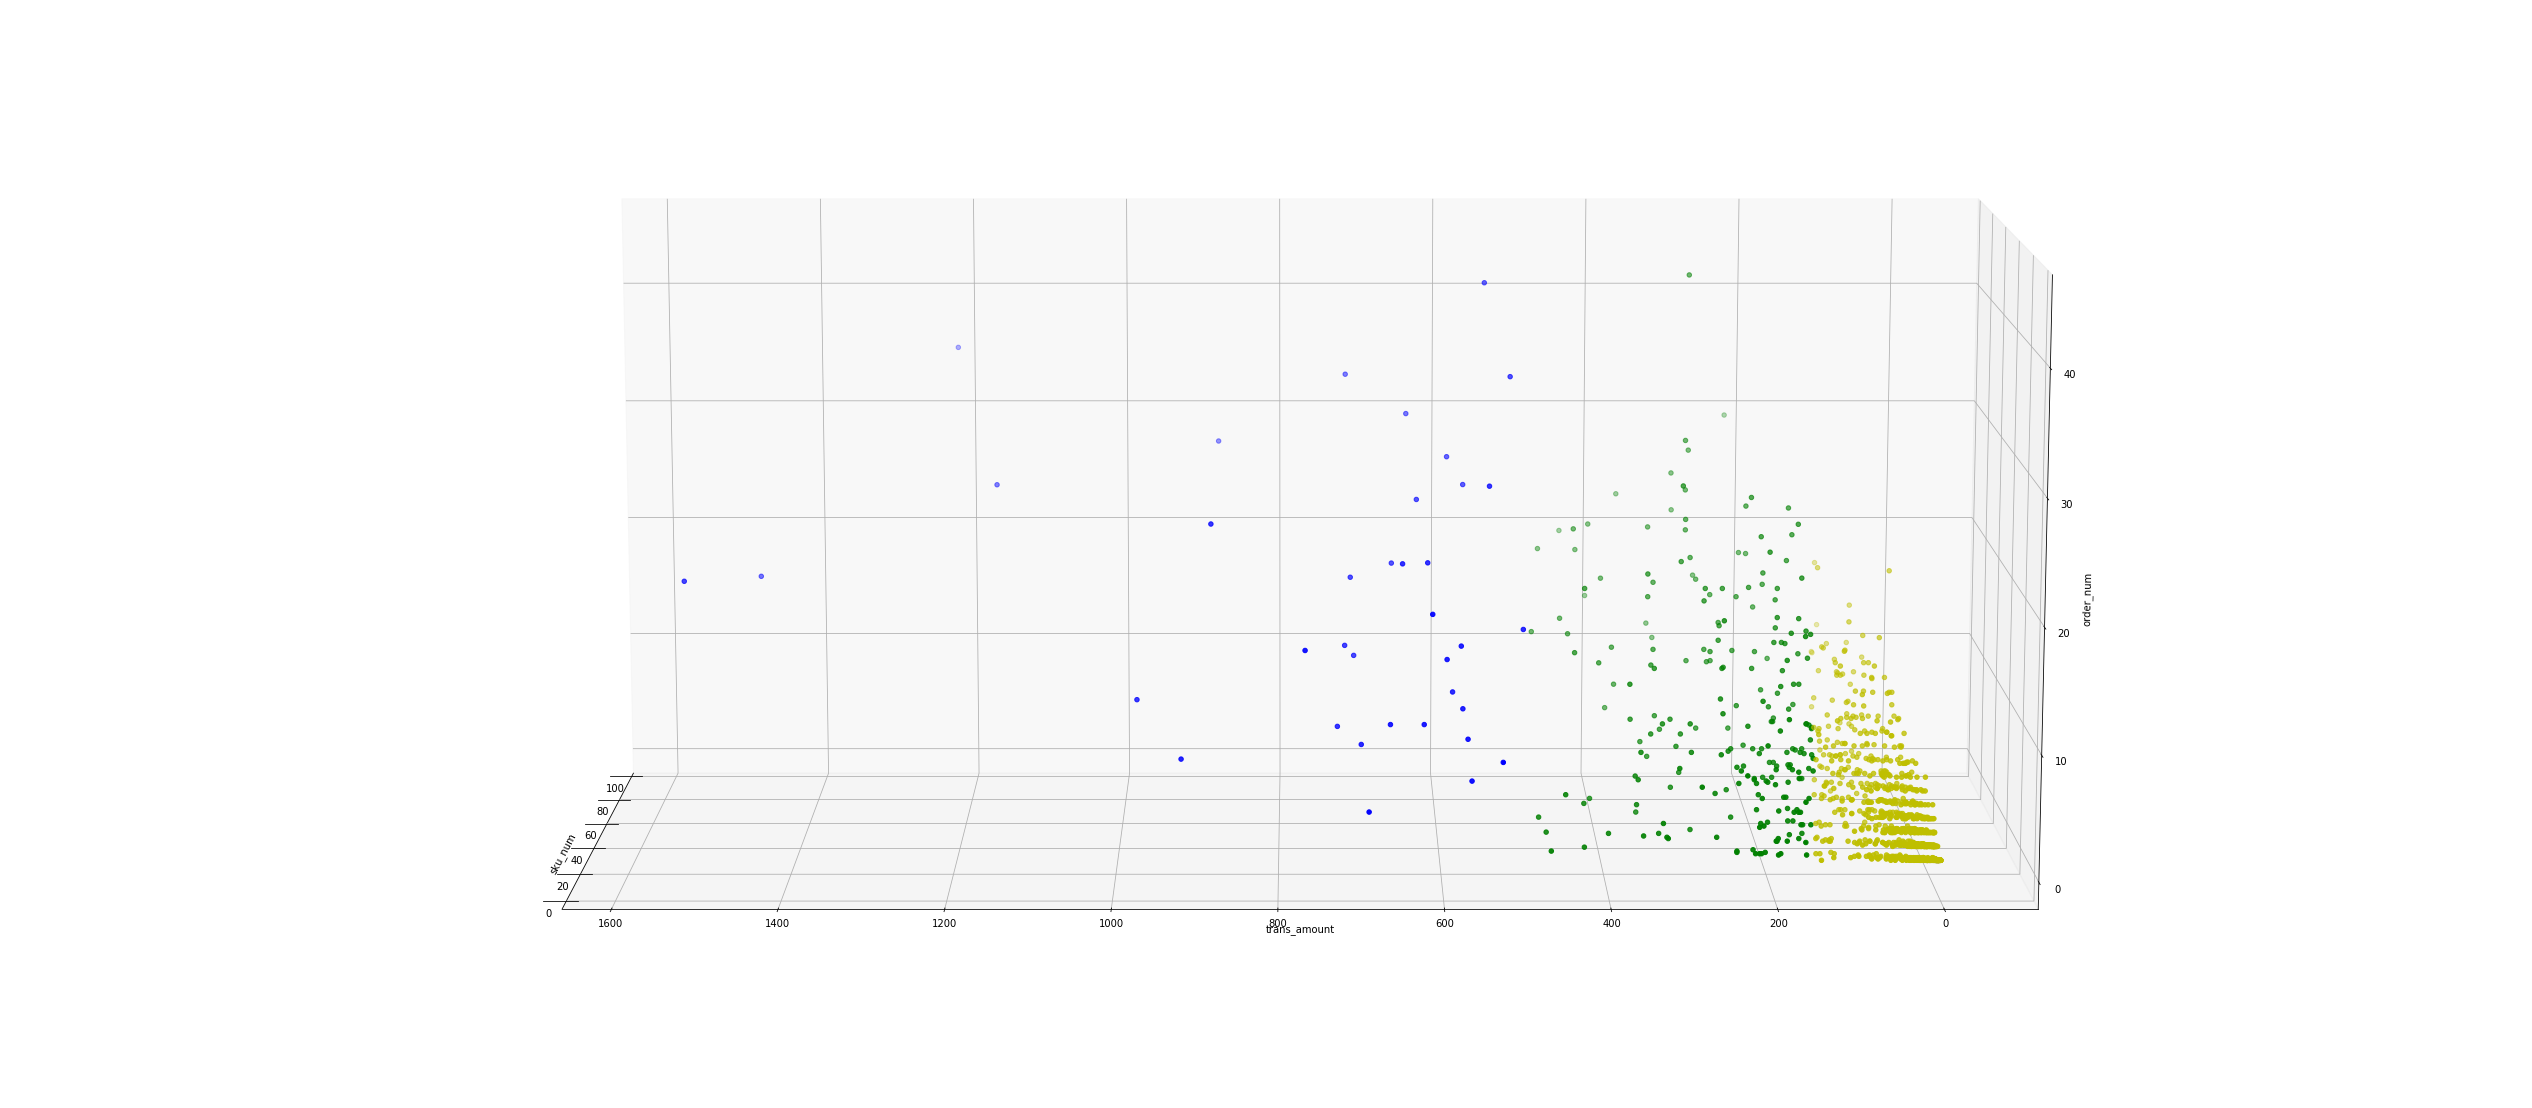

In [169]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
plt.figure(figsize=(45,20))
x, y, z = data['sku_num'], data['trans_amount'], data['order_num']
ax = plt.subplot(111, projection='3d')  # 创建一个三维的绘图工程
#  将数据点分成三部分画，在颜色上有区分度
ax.scatter(data[data['label']==0]['sku_num'], data[data['label']==0]['trans_amount'], data[data['label']==0]['order_num'], c='y')  # 绘制数据点
ax.scatter(data[data['label']==1]['sku_num'], data[data['label']==1]['trans_amount'], data[data['label']==1]['order_num'], c='b')
ax.scatter(data[data['label']==2]['sku_num'], data[data['label']==2]['trans_amount'], data[data['label']==2]['order_num'], c='g')

ax.set_zlabel('order_num')  # 坐标轴
ax.set_ylabel('trans_amount')
ax.set_xlabel('sku_num')
ax.view_init(elev=10., azim=180)
plt.show()
#fig.savefig('test2png.png', dpi=100)

# def init():
#     ax.scatter(x, y, z, marker='o', s=20, c="goldenrod", alpha=0.6)
#     return fig,

# def animate(i):
#     ax.view_init(elev=10., azim=i)
#     return fig,

# Animate
#anim = animation.FuncAnimation(plt.figure, animate)
# Save
#anim.save('basic_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])